In [66]:
import networkx as nx
import numpy as np

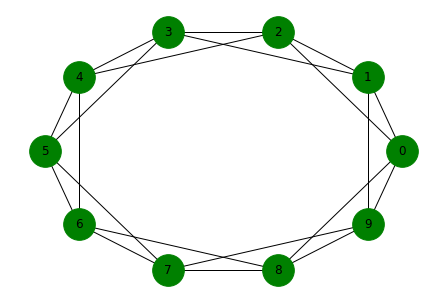

In [67]:
def adjacent_edges(nodes, halfk):
    n = len(nodes)
    for i, u in enumerate(nodes):
        for j in range(i+1, i+halfk+1):
            v = nodes[j % n]
            yield u, v


def make_ring_lattice(n, k):
    G = nx.Graph()
    nodes = range(n)
    G.add_nodes_from(nodes)
    G.add_edges_from(adjacent_edges(nodes, k//2))
    return G


lattice = make_ring_lattice(10, 4)
nx.draw_circular(lattice,
                 node_color='green',
                 node_size=1000,
                 with_labels=True)

In [68]:
set(lattice[2])

{0, 1, 3, 4}

In [69]:
def flip(p):
    return np.random.random() < p


def rewire(G, p):
    nodes = set(G)

    for u, v in G.edges():
        if flip(p):
            choices = nodes - {u} - set(G[u])
            new_v = np.random.choice(list(choices))
            G.remove_edge(u, v)
            G.add_edge(u, new_v)

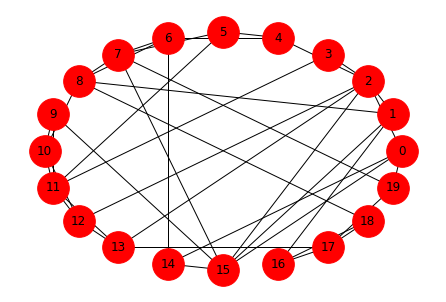

In [65]:
lattice = make_ring_lattice(20, 4)
rewire(lattice, 0.5)

nx.draw_circular(lattice,
                 node_size=1000,
                 node_color='red',
                 with_labels=True)